In [1]:
# stdin and stdout
# You can pipe data through them using sys.stdin and sys.stdout
# For example, here is a script that reads in lines of text and spits back out the ones that match 
# a regular expression:

# egrep.py
import sys, re

# sys.argv is the list of command-line arguments
# sys.argv[0] is the name of the program itself
# sys.argv[1] will be the regex specified at the command line
regex = sys.argv[1]
# for every line passed into the script
for line in sys.stdin:
    # if it matches the regex, write it to stdout
    if re.search(regex, line):
        sys.stdout.write(line)

In [2]:
# This code counts the lines it receives and then writes out the count:

# line_count.py
import sys

count = 0
for line in sys.stdin:
    count += 1

# print goes to sys.stdout
print count

0


In [4]:
# Here’s a script that counts the words in its input and writes out the most common ones:
# - - - - - - - - - - - - -- - - - -- - - - - -- - - -- - - - - - - - - - - - - - - -- - - - - - - - - -- - - - - - 

# most_common_words.py
#import sys
#from collections import Counter

# pass in number of words as first argument
#try:
    #num_words = int(sys.argv[1])
#except:
    #print "usage: most_common_words.py num_words"
    #sys.exit(1)   # non-zero exit code indicates error

#counter = Counter(word.lower()  # lowercase words
                  #for line in sys.stdin             #
                  #for word in line.strip().split()  # split on spaces
                  #if word)                          # skip empty 'words'

#for word, count in counter.most_common(num_words):
    #sys.stdout.write(str(count))
    #sys.stdout.write("\t")
    #sys.stdout.write(word)
    #sys.stdout.write("\n")      

#“after which you could do something like: 
#“C:\DataScience>type the_bible.txt | python most_common_words.py 10
#64193   the
#51380   and
#34753   of
#13643   to
#12799   that
#12560   in
#10263   he
#9840    shall
#8987    unto
#8836    for 

In [6]:
# BASICS OF TEXTFILES
# The first step to working with a text file is to obtain a file object using open:
# - - - - - - - - - - - - -- - - - -- - - - - -- - - -- - - - - - - - - - - - - - - -- - - - - - - - - -- - - - - - 

# 'r' means read-only
#file_for_reading = open('reading_file.txt', 'r')

# 'w' is write -- will destroy the file if it already exists!
#file_for_writing = open('writing_file.txt', 'w')

# 'a' is append -- for adding to the end of the file
#file_for_appending = open('appending_file.txt', 'a')

# don't forget to close your files when you're done
#file_for_writing.close()

In [8]:
# “Because it is easy to forget to close your files, you should always use them in a with block, 
# at the end of which they will be closed automatically:
# - - - - - - - - - - - - -- - - - -- - - - - -- - - -- - - - - - - - - - - - - - - -- - - - - - - - - -- - - - - - 

#with open(filename,'r') as f:
    #data = function_that_gets_data_from(f)

# at this point f has already been closed, so don't try to use it
#process(data)

In [9]:
# If you need to read a whole text file, you can just iterate over the lines of the file using for:
# - - - - - - - - - - - - -- - - - -- - - - - -- - - -- - - - - - - - - - - - - - - -- - - - - - - - - -- - - - - - 

#starts_with_hash = 0

#with open('input.txt','r') as f:
    #for line in file:               # look at each line in the file
        #if re.match("^#",line):     # use a regex to see if it starts with '#'
            #starts_with_hash += 1   # if it does, add 1 to the count

In [11]:
# For example, imagine you have a file full of email addresses, one per line, 
# and that you need to generate a histogram of the domain
# - - - - - - - - - - - - -- - - - -- - - - - -- - - -- - - - - - - - - - - - - - - -- - - - - - - - - -- - - - - - 

#def get_domain(email_address):
    #"""split on '@' and return the last piece"""
    #return email_address.lower().split("@")[-1]

#with open('email_addresses.txt', 'r') as f:
    #domain_counts = Counter(get_domain(line.strip())
                            #for line in f
                            #if "@" in line)

In [2]:
# More frequently you’ll work with files with lots of data on each line. 
# These files are very often either comma-separated or tab-separated. 
# Each line has several fields, with a comma (or a tab) indicating where one field ends and the next field starts.

# If your file has no headers (which means you probably want each row as a list, and which places the burden on you 
# to know what’s in each “column), you can use csv.reader to iterate over the rows, each of which will be 
# an appropriately split list.
# - - - - - - - - - - - - -- - - - -- - - - - -- - - -- - - - - - - - - - - - - - - -- - - - - - - - - -- - - - - - 

#import csv

#with open('tab_delimited_stock_prices.txt', 'rb') as f:
    #reader = csv.reader(f, delimiter='\t')
    #for row in reader:
        #date = row[0]
        #symbol = row[1]
        #closing_price = float(row[2])
        #process(date, symbol, closing_price)
        
# If your file has headers you can either skip the header row (with an initial call to reader.next()) or get each row as a dict
# (with the headers as keys) by using csv.DictReader
# - - - - - - - - - - - - -- - - - -- - - - - -- - - -- - - - - - - - - - - - - - - -- - - - - - - - - -- - - - - - 

#with open('colon_delimited_stock_prices.txt', 'rb') as f:
    #reader = csv.DictReader(f, delimiter=':')
    #for row in reader:
        #date = row["date"]
        #symbol = row["symbol"]
        #closing_price = float(row["closing_price"])
        #process(date, symbol, closing_price)
        
# You can similarly write out delimited data using csv.writer:
# - - - - - - - - - - - - -- - - - -- - - - - -- - - -- - - - - - - - - - - - - - - -- - - - - - - - - -- - - - - - 

#today_prices = { 'AAPL' : 90.91, 'MSFT' : 41.68, 'FB' : 64.5 }

#with open('comma_delimited_stock_prices.txt','wb') as f:
    #writer = csv.writer(f, delimiter=',')
    #for stock, price in today_prices.items():
        #writer.writerow([stock, price])       

In [3]:
# HTML AND THE PARSING THEREOF

# To get data out of HTML, we will use the BeautifulSoup library, which builds a tree out of the various elements
# on a web page and provides a simple interface for accessing them.
# - - - - - - - - - - - - -- - - - -- - - - - -- - - -- - - - - - - - - - - - - - - -- - - - - - - - - -- - - - - - 

#from bs4 import BeautifulSoup
#import requests
#html = requests.get("http://www.example.com").text
#soup = BeautifulSoup(html, 'html5lib')


# For example, to find the first <p> tag (and its contents) you can use:
# - - - - - - - - - - - - -- - - - -- - - - - -- - - -- - - - - - - - - - - - - - - -- - - - - - - - - -- - - - - - 

# first_paragraph = soup.find('p')        # or just soup.p”


# You can get the text contents of a Tag using its text property:
# - - - - - - - - - - - - -- - - - -- - - - - -- - - -- - - - - - - - - - - - - - - -- - - - - - - - - -- - - - - - 

# first_paragraph_text = soup.p.text
# first_paragraph_words = soup.p.text.split()


# You can extract a tag’s attributes by treating it like a dict:
# - - - - - - - - - - - - -- - - - -- - - - - -- - - -- - - - - - - - - - - - - - - -- - - - - - - - - -- - - - - - 

#first_paragraph_id = soup.p['id']       # raises KeyError if no 'id'
#first_paragraph_id2 = soup.p.get('id')  # returns None if no 'id'


# You can get multiple tags at once
# - - - - - - - - - - - - -- - - - -- - - - - -- - - -- - - - - - - - - - - - - - - -- - - - - - - - - -- - - - - - 

#all_paragraphs = soup.find_all('p')  # or just soup('p')
#paragraphs_with_ids = [p for p in soup('p') if p.get('id')]


#Frequently you’ll want to find tags with a specific class:
# - - - - - - - - - - - - -- - - - -- - - - - -- - - -- - - - - - - - - - - - - - - -- - - - - - - - - -- - - - - - 

#important_paragraphs = soup('p', {'class' : 'important'})
#important_paragraphs2 = soup('p', 'important')
#important_paragraphs3 = [p for p in soup('p')
                         #if 'important' in p.get('class', [])]
    

    
# If you want to find every <span> element that is contained inside a <div> element, you could do this:
# - - - - - - - - - - - - -- - - - -- - - - - -- - - -- - - - - - - - - - - - - - - -- - - - - - - - - -- - - - - - 

# warning, will return the same span multiple times
# if it sits inside multiple divs
# be more clever if that's the case
#spans_inside_divs = [span
                     #for div in soup('div')     # for each <div> on the page
                     #for span in div('span')]   # find each <span> inside it

In [1]:
# EXAMPLE: O’Reilly Books About Data

# To figure out how to extract the data, let’s download one of those pages and feed it to Beautiful Soup”

from bs4 import BeautifulSoup
import requests

# you don't have to split the url like this unless it needs to fit in a book
url = "http://shop.oreilly.com/category/browse-subjects/" + \
"data.do?sortby=publicationDate&page=1"
soup = BeautifulSoup(requests.get(url).text, 'html5lib')

In [2]:
# Each book (or video) seems to be uniquely contained in a <td> table cell element whose class is thumbtext

# A good first step is to find all of the td thumbtext tag elements:
tds = soup('td', 'thumbtext')
print len(tds)
# 30

0


In [3]:
# “Next we’d like to filter out the videos. If we inspect the HTML further, we see that each td contains one or more
# span elements whose class is pricelabel, and whose text looks like Ebook: or Video: or Print:. 
# It appears that the videos contain only one pricelabel, whose text starts with Video (after removing leading spaces) 
# This means we can test for videos with:

def is_video(td):
    """it's a video if it has exactly one pricelabel, and if
    the stripped text inside that pricelabel starts with 'Video'"""
    pricelabels = td('span', 'pricelabel')
    return (len(pricelabels) == 1 and
            pricelabels[0].text.strip().startswith("Video"))

print len([td for td in tds if not is_video(td)])
# 21 for me, might be different for you

0


In [6]:
# “Now we’re ready to start pulling data out of the td elements. It looks like the book title is the text inside 
# the <a> tag inside the <div class="thumbheader">:”

title = td.find("div", "thumbheader").a.text
author_name = td.find('div', 'AuthorName').text
authors = [x.strip() for x in re.sub("^By ", "", author_name).split(",")]

NameError: name 'td' is not defined

In [8]:
# The ISBN seems to be contained in the link that’s in the thumbheader <div>:

#isbn_link = td.find("div", "thumbheader").a.get("href")

# re.match captures the part of the regex in parentheses

#isbn = re.match("/product/(.*)\.do", isbn_link).group(1)

In [10]:
# And the date is just the contents of the <span class="directorydate">:

#date = td.find("span", "directorydate").text.strip()

In [11]:
def book_info(td):
    """given a BeautifulSoup <td> Tag representing a book,
    extract the book's details and return a dict"""

    title = td.find("div", "thumbheader").a.text
    by_author = td.find('div', 'AuthorName').text
    authors = [x.strip() for x in re.sub("^By ", "", by_author).split(",")]
    isbn_link = td.find("div", "thumbheader").a.get("href")
    isbn = re.match("/product/(.*)\.do", isbn_link).groups()[0]
    date = td.find("span", "directorydate").text.strip()
    
    return {
        "title" : title,
        "authors" : authors,
        "isbn" : isbn,
        "date" : date
    }

In [12]:
from bs4 import BeautifulSoup
import requests
from time import sleep
base_url = "http://shop.oreilly.com/category/browse-subjects/" + \
           "data.do?sortby=publicationDate&page="

books = []

NUM_PAGES = 31     # at the time of writing, probably more by now

for page_num in range(1, NUM_PAGES + 1):
    print "souping page", page_num, ",", len(books), " found so far"
    url = base_url + str(page_num)
    soup = BeautifulSoup(requests.get(url).text, 'html5lib')

    for td in soup('td', 'thumbtext'):
        if not is_video(td):
            books.append(book_info(td))

    # respect the robots.txt!
    sleep(30)

souping page 1 , 0  found so far
souping page 2 , 0  found so far
souping page 3 , 0  found so far
souping page 4 , 0  found so far
souping page 5 , 0  found so far
souping page 6 , 0  found so far
souping page 7 , 0  found so far
souping page 8 , 0  found so far
souping page 9 , 0  found so far
souping page 10 , 0  found so far
souping page 11 , 0  found so far
souping page 12 , 0  found so far
souping page 13 , 0  found so far
souping page 14 , 0  found so far
souping page 15 , 0  found so far
souping page 16 , 0  found so far
souping page 17 , 0  found so far
souping page 18 , 0  found so far
souping page 19 , 0  found so far
souping page 20 , 0  found so far
souping page 21 , 0  found so far
souping page 22 , 0  found so far
souping page 23 , 0  found so far
souping page 24 , 0  found so far
souping page 25 , 0  found so far
souping page 26 , 0  found so far
souping page 27 , 0  found so far
souping page 28 , 0  found so far
souping page 29 , 0  found so far
souping page 30 , 0  fo

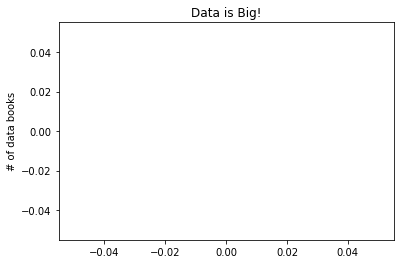

In [17]:
# “Now that we’ve collected the data, we can plot the number of books published each year”

def get_year(book):
    """book["date"] looks like 'November 2014' so we need to
    split on the space and then take the second piece"""
    return int(book["date"].split()[1])

# 2014 is the last complete year of data (when I ran this)
from collections import Counter

year_counts = Counter(get_year(book) for book in books
                      if get_year(book) <= 2014)

import matplotlib.pyplot as plt
years = sorted(year_counts)
book_counts = [year_counts[year] for year in years]
plt.plot(years, book_counts)
plt.ylabel("# of data books")
plt.title("Data is Big!")
plt.show()

In [19]:
# JSON
# Because HTTP is a protocol for transferring text, the data you request through a web API needs to be serialized 
# into a string format. Often this serialization uses JSON

import json
serialized = """{ "title" : "Data Science Book",
                  "author" : "Joel Grus",
                  "publicationYear" : 2014,
                  "topics" : [ "data", "science", "data science"] }"""
# parse the JSON to create a Python dict
deserialized = json.loads(serialized)
if "data science" in deserialized["topics"]:
    print deserialized

{u'publicationYear': 2014, u'author': u'Joel Grus', u'topics': [u'data', u'science', u'data science'], u'title': u'Data Science Book'}


In [21]:
# Most APIs these days require you to first authenticate yourself in order to use them”

import requests, json
endpoint = "https://api.github.com/users/ceciliarmt/repos"

repos = json.loads(requests.get(endpoint).text)

from dateutil.parser import parse

dates = [parse(repo["created_at"]) for repo in repos]
month_counts = Counter(date.month for date in dates)
weekday_counts = Counter(date.weekday() for date in dates)

In [22]:
last_5_repositories = sorted(repos,
                             key=lambda r: r["created_at"],
                             reverse=True)[:5]

last_5_languages = [repo["language"]
                    for repo in last_5_repositories]

In [23]:
# Example: Using the Twitter APIs

#from twython import Twython

#twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET)

# search for tweets containing the phrase "data science"
#for status in twitter.search(q='"data science"')["statuses"]:
    #user = status["user"]["screen_name"].encode('utf-8')
    #text = status["text"].encode('utf-8')
    #print user, ":", text
    #print

In [24]:
#from twython import TwythonStreamer

# appending data to a global variable is pretty poor form
# but it makes the example much simpler
#tweets = []

#class MyStreamer(TwythonStreamer):
    #"""our own subclass of TwythonStreamer that specifies
    #how to interact with the stream"""

    #def on_success(self, data):
        #""""what do we do when twitter sends us data? here data will be a Python dict representing a tweet""""
        # only want to collect English-language tweets
        #if data['lang'] == 'en':
            #tweets.append(data)
            #print "received tweet #", len(tweets)

        # stop when we've collected enough
        #if len(tweets) >= 1000:
            #self.disconnect()

    #def on_error(self, status_code, data):
        #print status_code, data
        #self.disconnect()

In [25]:
#stream = MyStreamer(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# starts consuming public statuses that contain the keyword 'data'

#stream.statuses.filter(track='data')

# if instead we wanted to start consuming a sample of *all* public statuses
# stream.statuses.sample()

In [26]:
# you could find the most common hashtags with:

#top_hashtags = Counter(hashtag['text'].lower()
                       #for tweet in tweets
                       #for hashtag in tweet["entities"]["hashtags"])

#print top_hashtags.most_common(5)